# Practice Manipulating Vector Data

For this practice, we will explore the following data sets:
 * http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
    * [Read more here](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/)
 * http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_populated_places.zip
    * [Read more here](http://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-populated-places/)

## Data Set 1: 
 * Download the ZIP file to your `module3/temp/` folder.
 * Create `module4/temp/ne_admin_countries/` folder
 * Change into `ne_admin_countries` folder and unzip the Country Borders data into the folder.
   * Example files in folder after unpacking.
```BASH
module4/temp]$ find ne_admin_countries/
ne_admin_countries/
ne_admin_countries/ne_110m_admin_0_countries.README.html
ne_admin_countries/ne_110m_admin_0_countries.VERSION.txt
ne_admin_countries/ne_110m_admin_0_countries.cpg
ne_admin_countries/ne_110m_admin_0_countries.dbf
ne_admin_countries/ne_110m_admin_0_countries.prj
ne_admin_countries/ne_110m_admin_0_countries.shp
ne_admin_countries/ne_110m_admin_0_countries.shx
```

In [1]:
## M4:P1:Cell01
# Add Your Code to Download the File
# -----------------------------------------


If all went well, you can load the file with the next cell.

<span style="background:yellow">If you get any errors</span>, carefully resolve your issues until your directory structure under module 3 for the temp folder matches above!

In [2]:
## M4:P1:Cell02
# Add Your Code to load your data into a dataframe
# ------------------------------------------------

geodf = 

In [3]:
## M4:P1:Cell03
# Add Your Code to Inspect the GeoDataFrame
# -----------------------------------------


,0,1,2,3,4
ABBREV,Afg.,Ang.,Alb.,U.A.E.,Arg.
ABBREV_LEN,4,4,4,6,4
ADM0_A3,AFG,AGO,ALB,ARE,ARG
ADM0_A3_IS,AFG,AGO,ALB,ARE,ARG
ADM0_A3_UN,-99,-99,-99,-99,-99
ADM0_A3_US,AFG,AGO,ALB,ARE,ARG
ADM0_A3_WB,-99,-99,-99,-99,-99
ADM0_DIF,0,0,0,0,0
ADMIN,Afghanistan,Angola,Albania,United Arab Emirates,Argentina
BRK_A3,AFG,AGO,ALB,ARE,ARG


Review the columns and such of the data frame.
Answer the following Questions:
 1. What is the datatype of the geometric elements within this geospatial data file?
 1. What do you expect to be relevant fields for performing aggregation operations on the data frame and why?

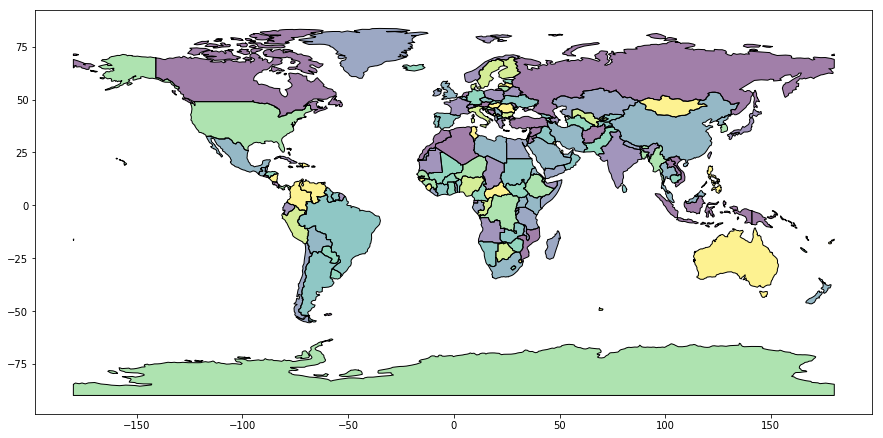

In [4]:
geodf.plot(figsize=(15,15))

Take a look at the GeoPandas API for Disolving
 * http://geopandas.org/aggregation_with_dissolve.html
 

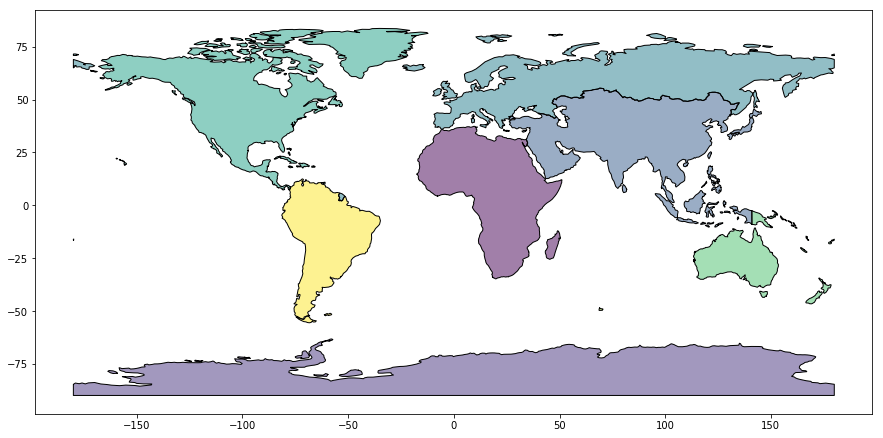

In [5]:
continents = geodf.dissolve(by='CONTINENT')
continents.plot(figsize=(15,15))

Now instead of looking at continents look at subregions. 

In [1]:
## M4:P1:Cell05
# Add Your Code to create a subregion dataframe and then plot it.
# ---------------------------------------------------------------



## Data Set 2: 
 * Download the ZIP file to your `module4/temp/` folder.
 * Create `module4/temp/ne_pop_places/` folder
 * Change into `ne_pop_places` folder and unzip the Populated Places data into the folder.
   * Example files in folder after unpacking.
```BASH
module3/temp]$ find ne_pop_places/
ne_pop_places/
ne_pop_places/ne_10m_populated_places.README.html
ne_pop_places/ne_10m_populated_places.VERSION.txt
ne_pop_places/ne_10m_populated_places.cpg
ne_pop_places/ne_10m_populated_places.dbf
ne_pop_places/ne_10m_populated_places.prj
ne_pop_places/ne_10m_populated_places.shp
ne_pop_places/ne_10m_populated_places.shx
```
Then load the file into a new Geo Data Frame

In [7]:
## M4:P1:Cell06
#  Add download code here
# -----------------------


#### Load and Examine the data!

In [ ]:
## M3:P1:Cell07
#  Load into a GeoPanda Dataframe
# -------------------------------

pop_pl = 



In [ ]:
## M3:P1:Cell08
# Examine the data frame
# ----------------------


### Merging Data 


We now have multiple data sets, so lets look at merging data.

As our dataframes contain a large number of columns, let's first create some simpler data frames. 

In [ ]:
countries = geodf[['NAME_LONG','CONTINENT', 'SUBREGION','geometry', 'ISO_A3']]

countries.head()

Now using the populated places dataframe create a new dataframe 'cities' with the following columns: ADM0NAME, CAPALT, WORLDCITY, geometry

In [ ]:
## M4:P1:Cell09
#  Add dataframe column code here
# -------------------------------


Using a join, let's create a dataframe that includes all cities (included in our dataset) located in Europe.

In [ ]:
merge_cities = sjoin(cities, countries, how="left")

merge_cities.plot(figsize=(15,15))

Now we have a dataset 'merge' that has the city locations along with continent information. So now we can do a simple look at the cities in Europe. 

In [ ]:
Europe_cities = merge_cities[merge_cities['CONTINENT'] == 'Europe']

Europe_cities.plot(figsize=(15,15))

In [ ]:
Europe_cities.head()

Now let's do a right join on the same data.

In [ ]:
## M4:P1:Cell10
#  Right merge of dataframes
# --------------------------

merge_countries = sjoin(cities, countries, how="right")

# merge_countries.plot(figsize=(15,15))

Why is the result of this right join not very useful or is it? What information was lost in the join, and why?